# Milestone 1: Describe Variables, Set Goals, and Perform EDA

### List of Key Variables in "movie_dataset.csv":

1. Variable Name: "title"
Description: Title of Film
Type: object

2. Variable Name: "budget"
Description: The budget of the movie
Type: int

3. Variable Name: "genres"
Description: The genres of the movie
Type: object

4. Variable Name: "keywords"
Description: The keywords associated with the movie
Type: object

5. Variable Name: "popularity"
Description: The popularity score of the movie
Type: float

6. Variable Name: "production_companies"
Description: The production companies involved in making the movie
Type: object

7. Variable Name: "production_countries"
Description: The countries where the movie was produced
Type: object

8. Variable Name: "release_date"
Description: The release date of the movie
Type: object

9. Variable Name: "revenue"
Description: The revenue generated by the movie
Type: int

10. Variable Name: "runtime"
Description: The duration of the movie in minutes
Type: float

11. Variable Name: "vote_average"
Description: The average rating given to the movie by users
Type: float

12. Variable Name: "director"
Description: The director of the movie
Type: object

In [8]:
# perform EDA

# import pandas & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# load dataset into dataframe
df = pd.read_csv('/workspace/DS3001-Project1/Data/movie_dataset.csv',low_memory=False)


In [16]:

print("Shape: \n", df.shape,'\n') 
# Number of rows: 4803
# Number of Columns: 24

# Look at first few rows
print( df.head() )



Shape: 
 (4803, 24) 

   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         

In [25]:

# print list of column names with data types:

for idx, (column, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"{idx}. {column}: {dtype}")

1. index: int64
2. budget: int64
3. genres: object
4. homepage: object
5. id: int64
6. keywords: object
7. original_language: object
8. original_title: object
9. overview: object
10. popularity: float64
11. production_companies: object
12. production_countries: object
13. release_date: object
14. revenue: int64
15. runtime: float64
16. spoken_languages: object
17. status: object
18. tagline: object
19. title: object
20. vote_average: float64
21. vote_count: int64
22. cast: object
23. crew: object
24. director: object



# EDA for Directors
## Which directors have directed the most movies? What is the distribution for number of movies directed?


Let's create a table showing the number of movies directed per director:

In [18]:

# Create a table showing the number of movies directed by each director
director_counts = df['director'].value_counts().to_frame().reset_index()
director_counts.columns = ['Director', 'Number of Movies Directed']
print(director_counts)
print( '\n' )


                Director  Number of Movies Directed
0       Steven Spielberg                         27
1            Woody Allen                         21
2         Clint Eastwood                         20
3        Martin Scorsese                         20
4              Spike Lee                         16
...                  ...                        ...
2344   Bradley Rust Gray                          1
2345  Collin Joseph Neal                          1
2346         Kirk Loudon                          1
2347        Kevin Jordan                          1
2348     Malcolm Goodwin                          1

[2349 rows x 2 columns]




Steven Spielberg has the highest movie count with a total of 27 movies directed. He's followed up by Woody Allen and Clint Eastwood.

Now, let's create a stats table showing the distribution of movie counts per director:

In [26]:

# Create descriptive statistics table for movies per director:
director_counts = df['director'].value_counts()
descriptive_stats = director_counts.describe()
print("Descriptive Statistics for Number of Movies Per Director:")
print(descriptive_stats)


Descriptive Statistics for Number of Movies Per Director:
count    2349.000000
mean        2.031928
std         2.100398
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
Name: count, dtype: float64


This table suggests a high concentration of directors who have directed only 1 movie. The median movie count is 1, and the 3rd quartile for movie count is only 2 movies. Let's observe this distribution in the form of a histogram:

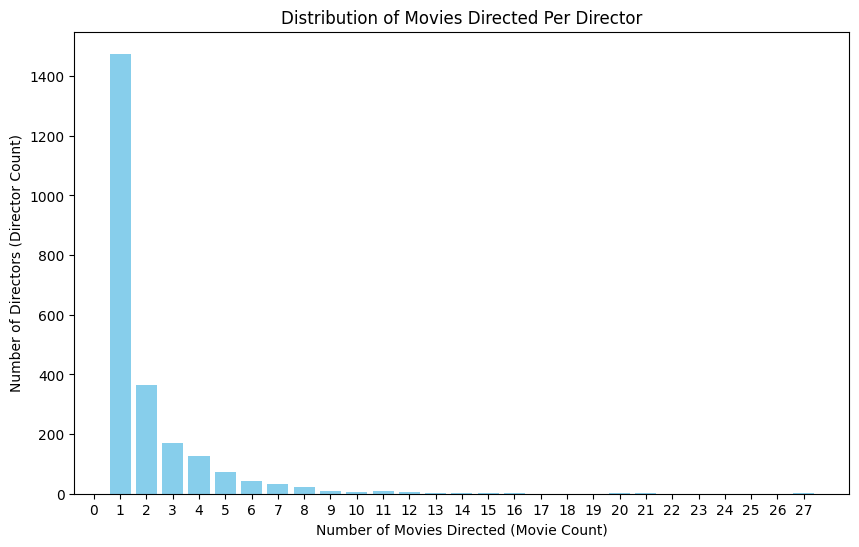

In [20]:

# Create a histogram showing the distribution of movies directed per director:
director_counts = df['director'].value_counts()
distribution = director_counts.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')
plt.xlabel('Number of Movies Directed (Movie Count)')
plt.ylabel('Number of Directors (Director Count)')
plt.title('Distribution of Movies Directed Per Director')
plt.xticks(range(0, 28))
plt.show()
print( '\n' )


This histogram is right skewed, showing a large number of directors who directed only one movie.



# EDA on movie runtime
## What is the distribution of movie runtime in the dataset? Is there a relationship between movie runtime and rating?


Descriptive statistics for runtime:

In [21]:

# Descriptive statistics for runtime:
runtime_table = df[ "runtime" ].describe()
print( "Descriptive statistics for movie runtime: \n", runtime_table )


Descriptive statistics for movie runtime: 
 count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64


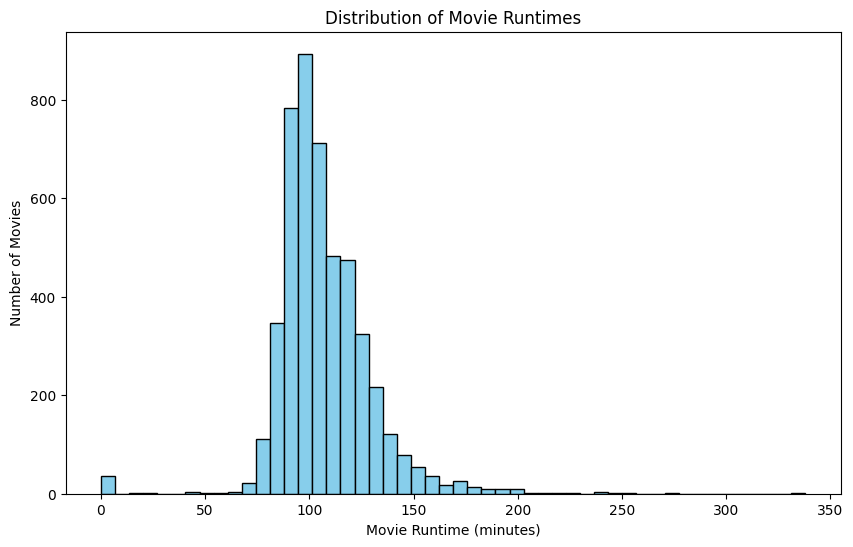

In [22]:

# Histogram for runtime:
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.show()


The histogram for movie runtime appears uniform, with one peak at around 100 minutes. There is a cluster of outliers around the 0-10 minute mark.

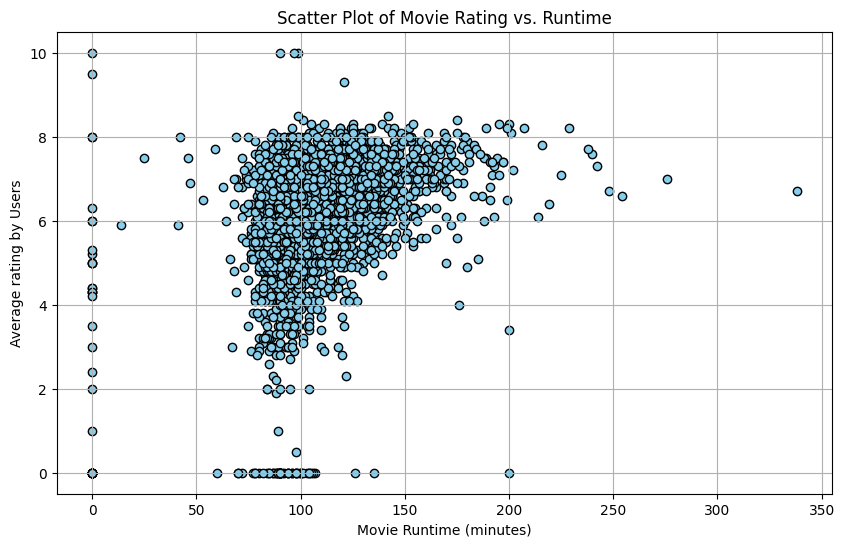

In [23]:

# Scatterplot for runtime vs. average rating:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_average'], color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Average rating by Users')
plt.title('Scatter Plot of Movie Rating vs. Runtime')
plt.grid(True)
plt.show()


Scatterplot appears nonlinear, minimal correlation between runtime and user rating. Let's run a correlation test:

In [24]:

runtime_rating_correlation = df['runtime'].corr(df['vote_average'])
print(f"Correlation between Movie Runtime and User Rating: {runtime_rating_correlation:.2f}")
# movie rating and runtime have a positive correlation of 0.38

Correlation between Movie Runtime and User Rating: 0.38
